In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Подготовка данных

In [2]:
data = pd.read_csv('/Users/sergejvasiljev/Documents/DATASETS/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data = data[data['Species'].isin(['Iris-versicolor', 'Iris-virginica'])].iloc[:,1:6].reset_index(drop=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,7.0,3.2,4.7,1.4,Iris-versicolor
1,6.4,3.2,4.5,1.5,Iris-versicolor
2,6.9,3.1,4.9,1.5,Iris-versicolor
3,5.5,2.3,4.0,1.3,Iris-versicolor
4,6.5,2.8,4.6,1.5,Iris-versicolor


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit( data['Species'])
le.classes_

array(['Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
X = data.iloc[:,0:4]
y = pd.Series(data = le.transform(data['Species']))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Градиентный спуск

In [7]:
iter_ = 20
lrate = 0.001

In [8]:
def sigmoid(X, theta):    
    z = np.dot(X, theta[1:]) + theta[0]
    return 1.0 / ( 1.0 + np.exp(-z))

In [9]:
def costF(y, hx):
    f = -y.dot(np.log(hx)) - ((1 - y).dot(np.log(1-hx)))
    return f

In [10]:
def grad(X, y, theta, lrate, iter_):
    cost = []
    for i in range(num_iter):
        hx = sigmoid(X, theta)
        error = hx - y
        grad = X.T.dot(error)

        theta[0] = theta[0] - lrate * error.sum()
        theta[1:] = theta[1:] - lrate * grad
        
        cost.append(costF(y, hx))
    return cost 

In [11]:
m, n = X_train.shape

theta = np.zeros(1+n)

alpha = 0.001
num_iter = 6000

cost = grad(X_train, y_train, theta, lrate, iter_)

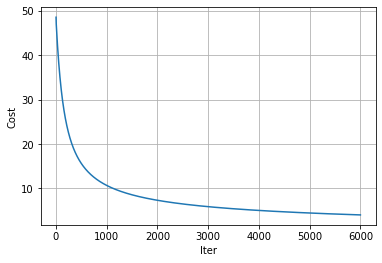

In [12]:
plt.plot(range(1, len(cost) + 1), cost)
plt.xlabel('Iter')
plt.ylabel('Cost')
plt.grid()

In [13]:
print ('Полученные параметры', theta)

Полученные параметры [-3.2250731  -3.15907082 -5.02881905  5.78157955  5.55789003]


In [14]:
cost[-1]

4.055432841054199

In [15]:
m, n = X_test.shape

theta = np.zeros(1+n)

alpha = 0.001
num_iter = 8000

cost = grad(X_test, y_test, theta, lrate, iter_)

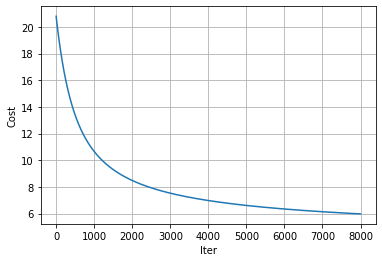

In [16]:
plt.plot(range(1, len(cost) + 1), cost)
plt.xlabel('Iter')
plt.ylabel('Cost')
plt.grid()

In [17]:
print ('Полученные параметры', theta)

Полученные параметры [-2.39772716 -3.44931491 -1.43779075  3.88509718  5.49348271]


## Градиентный спуск Нестерова

In [18]:
m, n = X_train.shape
theta = np.zeros(1+n)

In [19]:
def learn_nesterov(coefs, x, y, num_epochs=20, momentum=0.9, learning_rate=0.01):
    v_t = [0 for _ in range(len(coefs))]
    cost = []
    for it in range(num_epochs):
        pr_coefs  = [coefs[i] - momentum*v_t[i] for i in range(len(coefs))]
        gr_coefs = grad(x, y, pr_coefs, learning_rate, num_epochs)
        for i in range(len(coefs)):
            v_t[i] = momentum*v_t[i] + learning_rate*gr_coefs[i]
            coefs[i] = coefs[i]-v_t[i]
        hx = sigmoid(x, theta)
        cost.append(costF(y, hx))
    return cost, coefs

In [20]:
learn_nesterov(theta, X_train, y_train)

<ipython-input-9-c8cba7a91240>:2: RuntimeWarning: divide by zero encountered in log
  f = -y.dot(np.log(hx)) - ((1 - y).dot(np.log(1-hx)))
<ipython-input-8-63eed407582a>:3: RuntimeWarning: overflow encountered in exp
  return 1.0 / ( 1.0 + np.exp(-z))


([2172.495798248249,
  16077.575198508073,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 array([nan, nan, nan, nan, nan]))

In [21]:
print ('Полученные параметры', theta)

Полученные параметры [nan nan nan nan nan]


In [22]:
cost[-1]

5.977701591729488

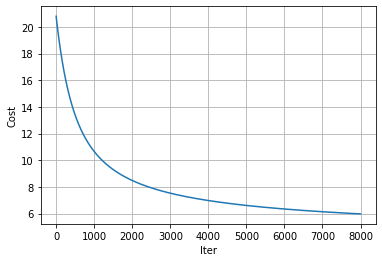

In [23]:
plt.plot(range(1, len(cost) + 1), cost)
plt.xlabel('Iter')
plt.ylabel('Cost')
plt.grid()

In [24]:
learn_nesterov(theta, X_test, y_test)

([nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 array([nan, nan, nan, nan, nan]))

In [25]:
print ('Полученные параметры', theta)

Полученные параметры [nan nan nan nan nan]


In [26]:
cost[-1]

5.977701591729488

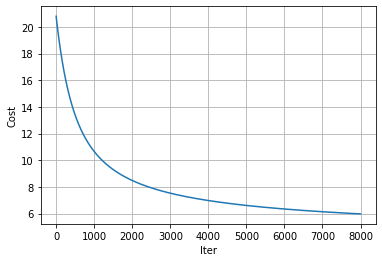

In [27]:
plt.plot(range(1, len(cost) + 1), cost)
plt.xlabel('Iter')
plt.ylabel('Cost')
plt.grid()

## RMSprop

In [28]:
num_epochs = 20
momentum = 0.9
learning_rate = 0.001
theta = np.zeros(1+n)

In [29]:
def learn_RMSprop(theta, x, y):
    e = 10**(-8)
    S = [0 for _ in range(len(theta))]
    cost =[]
    for it in range(num_epochs):
        gr_coefs = grad(x, y, theta, learning_rate, num_epochs)
        gr_coefs_2 = [x**2 for x in gr_coefs]
        for i in range(len(theta)):
            S[i]=momentum*S[i] + (1-momentum)*gr_coefs_2[i]
            theta[i] = theta[i]-learning_rate* (gr_coefs[i]/(math.sqrt(S[i])+e))  
        hx = sigmoid(x, theta)
        cost.append(costF(y, hx))
    return cost, theta

In [30]:
learn_RMSprop(theta, X_train, y_train)

([3.459804367417636,
  2.3286975918442137,
  1.8368062327134729,
  1.5483764054104985,
  1.3546088317569043,
  1.2136190300162157,
  1.105450651506672,
  1.0192581814790371,
  0.9485905544242355,
  0.8893478246581892,
  0.8387882905491277,
  0.7950029081220121,
  0.7566178852429418,
  0.7226171354434465,
  0.6922315122006352,
  0.6648671052388675,
  0.6400573401060354,
  0.6174300988734569,
  0.5966846109806898,
  0.577574869072456],
 array([-13.76723152,  -5.72733123, -13.75081   ,  13.51001024,
         13.85178929]))

In [31]:
print ('Полученные параметры', theta)

Полученные параметры [-13.76723152  -5.72733123 -13.75081     13.51001024  13.85178929]


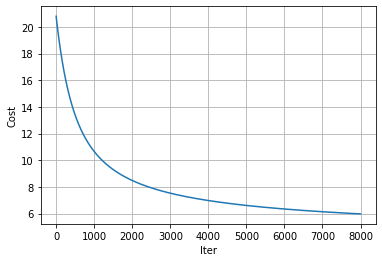

In [32]:
plt.plot(range(1, len(cost) + 1), cost)
plt.xlabel('Iter')
plt.ylabel('Cost')
plt.grid()

In [33]:
cost[-1]

5.977701591729488

In [34]:
learn_RMSprop(theta, X_test, y_test)

([6.862195136516386,
  5.9087051336254675,
  5.397259377501787,
  5.0487497722289145,
  4.800316344147899,
  4.624709827608561,
  4.502604493464472,
  4.418751626087396,
  4.3613645405106904,
  4.321682690314189,
  4.293510034811174,
  4.2727002135295775,
  4.256613566264859,
  4.243625450983636,
  4.23274681389346,
  4.223367292811332,
  4.215097176469042,
  4.207676093924064,
  4.2009219144115875,
  4.194702208032185],
 array([-18.09229322,  -2.69825542,  -1.58131899,   3.79908176,
         12.9470388 ]))

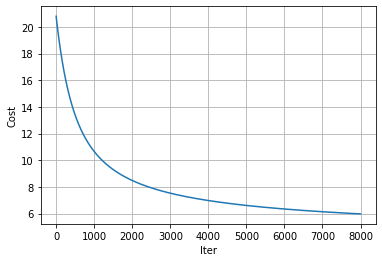

In [35]:
plt.plot(range(1, len(cost) + 1), cost)
plt.xlabel('Iter')
plt.ylabel('Cost')
plt.grid()

In [36]:
cost[-1]

5.977701591729488